In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
pd.set_option("display.precision", 5)

In [299]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [300]:
ff = pd.read_excel('data/5factors.xlsx')
rt = pd.read_excel('data/north.xlsx' , skiprows=3)
esg = pd.read_excel('data/north31.xlsx', skiprows=3)
print(rt.shape)
print(esg.shape)
print(ff.shape)

(2352, 124)
(12, 739)
(8261, 7)


In [301]:
pd.set_option('display.max_columns',735) # I want to see all the columns
pd.set_option('display.max_rows',735) 

In [302]:
ff.rename(columns = {'Unnamed: 0' : 'date'}, inplace=True)
ff['date'] = pd.to_datetime(ff['date'], format='%Y%m%d')
filt = (ff['date'] >= pd.to_datetime('2013-04-03')) & (ff['date'] <= pd.to_datetime('2022-02-28'))
ff = ff[filt]
ff.reset_index(inplace = True, drop = True)

In [303]:
rt.drop(index=[0,1,2], inplace=True)
rt.reset_index(inplace = True, drop = True) # Drop old index too

In [304]:
it = rt.copy()
it.to_excel('it.xlsx')

In [305]:
rt.rename(columns={'Unnamed: 0':'date'},inplace = True) 
xx = ['1COV GY Equity','DTG GY Equity','SINCH SS Equity',
                 'SHL GY Equity','NEL NO Equity','DHER GY Equity',
                 'HFG GY Equity','LIN GY Equity','NETS DC Equity',
                 'DAX Index','OMXS30B Index','OMXC25 Index','OMX Index']
drop_these = []
for i in xx:
    for j in range(1,6):
        drop_these.append(i + '.' + str(j))
drop_these = xx + drop_these
rt.drop(columns=xx, inplace = True)

In [306]:
rt.columns = rt.columns.str.replace(' GY', ' G')
rt.columns = rt.columns.str.replace(' SS', ' S')
rt.columns = rt.columns.str.replace(' NO', ' N')
rt.columns = rt.columns.str.replace(' DC', ' D')
rt.columns = rt.columns.str.replace(' Equity', '')
rt.columns = rt.columns.str.replace(' ', '_')

In [307]:
rt['date'] = pd.to_datetime(rt['date'])
#rt.set_index('date',inplace = True) 

In [308]:
esg.drop(columns=drop_these,inplace = True) 
esg.drop(index=[0,2], inplace=True)
esg.rename(columns={'Unnamed: 0':'Date'},inplace = True) 
esg.reset_index(inplace = True, drop = True) 

In [309]:
esg.replace({'ESG_DISCLOSURE_SCORE': 'ESG', 'ENVIRON_DISCLOSURE_SCORE': 'E',
             'SOCIAL_DISCLOSURE_SCORE': 'S','GOVNCE_DISCLOSURE_SCORE': 'G',
             'HISTORICAL_MARKET_CAP' : 'HMCAP', 'CUR_MKT_CAP': 'MCAP'}, inplace=True)

In [310]:
asg = esg.iloc[1] + ' ' + esg.iloc[0]
esg = esg.append(asg, ignore_index=True)
esg.loc[10,'Date'] = 'date'
nnn = esg.loc[10]
esg.rename(columns=nnn, inplace=True)
esg.drop(index=[0,1,10], inplace=True)
esg.reset_index(inplace = True, drop = True)

In [311]:
esg.columns = esg.columns.str.replace(' GY', ' G')
esg.columns = esg.columns.str.replace(' SS', ' S')
esg.columns = esg.columns.str.replace(' NO', ' N')
esg.columns = esg.columns.str.replace(' DC', ' D')
esg.columns = esg.columns.str.replace(' Equity', '')
esg.columns = esg.columns.str.replace(' ', '_')
esg.set_index('date', inplace=True)

In [312]:
year_sc = list(esg.index)

mg_esg = []
for i in esg.index:
    mg_esg.append(esg.loc[i, 'ADS_G_ESG' : 'ZAL_G_ESG'].mean())
    
mg_e = []
for i in esg.index:
    mg_e.append(esg.loc[i, 'ADS_G_E' : 'ZAL_G_E'].mean())

mg_s = []
for i in esg.index:
    mg_s.append(esg.loc[i, 'ADS_G_S' : 'ZAL_G_S'].mean())

mg_g = []
for i in esg.index:
    mg_g.append(esg.loc[i, 'ADS_G_G' : 'ZAL_G_G'].mean())

ms_esg = []
for i in esg.index:
    ms_esg.append(esg.loc[i, 'ABB_S_ESG' : 'VOLVB_S_ESG'].mean())
    
ms_e = []
for i in esg.index:
    ms_e.append(esg.loc[i, 'ABB_S_E' : 'VOLVB_S_E'].mean())

ms_s = []
for i in esg.index:
    ms_s.append(esg.loc[i, 'ABB_S_S' : 'VOLVB_S_S'].mean())

ms_g = []
for i in esg.index:
    ms_g.append(esg.loc[i, 'ABB_S_G' : 'VOLVB_S_G'].mean())
    
mn_esg = []
for i in esg.index:
    mn_esg.append(esg.loc[i, 'AKER_N_ESG' : 'STB_N_ESG'].mean())
    
mn_e = []
for i in esg.index:
    mn_e.append(esg.loc[i, 'AKER_N_E' : 'STB_N_E'].mean())

mn_s = []
for i in esg.index:
    mn_s.append(esg.loc[i, 'AKER_N_S' : 'STB_N_S'].mean())

mn_g = []
for i in esg.index:
    mn_g.append(esg.loc[i, 'AKER_N_G' : 'STB_N_G'].mean())

md_esg = []
for i in esg.index:
    md_esg.append(esg.loc[i, 'AMBUB_D_ESG' : 'VWS_D_ESG'].mean())
    
md_e = []
for i in esg.index:
    md_e.append(esg.loc[i, 'AMBUB_D_E' : 'VWS_D_E'].mean())

md_s = []
for i in esg.index:
    md_s.append(esg.loc[i, 'AMBUB_D_S' : 'VWS_D_S'].mean())

md_g = []
for i in esg.index:
    md_g.append(esg.loc[i, 'AMBUB_D_G' : 'VWS_D_G'].mean())

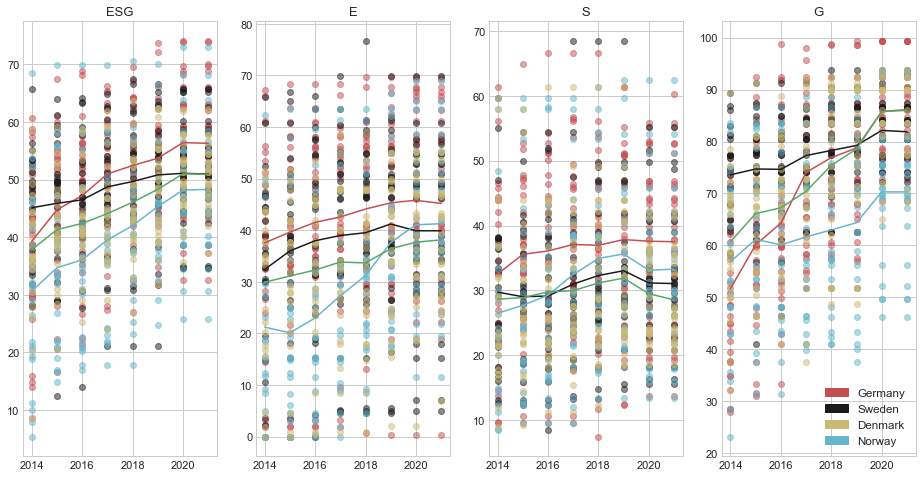

In [313]:
fig = plt.figure(figsize=(16, 8))
plt.rcParams['font.size'] = '13' # Set general font size

ax1 = fig.add_subplot(1,4,1)

ax1.plot(esg.loc[:, 'ADS_G_ESG' : 'ZAL_G_ESG'], 'o',color='r', alpha=0.5)
ax1.plot(esg.loc[:, 'ABB_S_ESG' : 'VOLVB_S_ESG'], 'o', color='k',alpha=0.5)
ax1.plot(esg.loc[:, 'AKER_N_ESG' : 'STB_N_ESG'], 'o', color='c',alpha=0.5)
ax1.plot(esg.loc[:, 'AMBUB_D_ESG' : 'VWS_D_ESG'], 'o',color='y', alpha=0.5)
ax1.plot(year_sc,mg_esg, color='r')
ax1.plot(year_sc,ms_esg, color='k')
ax1.plot(year_sc,mn_esg, color='c')
ax1.plot(year_sc,md_esg, color='g')
ax1.set_title('ESG',fontsize=13)

ax2 = fig.add_subplot(1,4,2)

ax2.plot(esg.loc[:, 'ADS_G_E' : 'ZAL_G_E'], 'o',color='r', alpha=0.5)
ax2.plot(esg.loc[:, 'ABB_S_E' : 'VOLVB_S_E'], 'o', color='k',alpha=0.5)
ax2.plot(esg.loc[:, 'AKER_N_E' : 'STB_N_E'], 'o', color='c',alpha=0.5)
ax2.plot(esg.loc[:, 'AMBUB_D_E' : 'VWS_D_E'], 'o',color='y', alpha=0.5)
ax2.plot(year_sc,mg_e, color='r')
ax2.plot(year_sc,ms_e, color='k')
ax2.plot(year_sc,mn_e, color='c')
ax2.plot(year_sc,md_e, color='g')
ax2.set_title('E',fontsize=13)

ax3 = fig.add_subplot(1,4,3)

ax3.plot(esg.loc[:, 'ADS_G_S' : 'ZAL_G_S'], 'o',color='r', alpha=0.5)
ax3.plot(esg.loc[:, 'ABB_S_S' : 'VOLVB_S_S'], 'o', color='k',alpha=0.5)
ax3.plot(esg.loc[:, 'AKER_N_S' : 'STB_N_S'], 'o', color='c',alpha=0.5)
ax3.plot(esg.loc[:, 'AMBUB_D_S' : 'VWS_D_S'], 'o',color='y', alpha=0.5)
ax3.plot(year_sc,mg_s, color='r')
ax3.plot(year_sc,ms_s, color='k')
ax3.plot(year_sc,mn_s, color='c')
ax3.plot(year_sc,md_s, color='g')
ax3.set_title('S',fontsize=13)

ax4 = fig.add_subplot(1,4,4)

ax4.plot(esg.loc[:, 'ADS_G_G' : 'ZAL_G_G'], 'o',color='r', alpha=0.5)
ax4.plot(esg.loc[:, 'ABB_S_G' : 'VOLVB_S_G'], 'o', color='k',alpha=0.5)
ax4.plot(esg.loc[:, 'AKER_N_G' : 'STB_N_G'], 'o', color='c',alpha=0.5)
ax4.plot(esg.loc[:, 'AMBUB_D_G' : 'VWS_D_G'], 'o',color='y', alpha=0.5)
ax4.plot(year_sc,mg_g, color='r')
ax4.plot(year_sc,ms_g, color='k')
ax4.plot(year_sc,mn_g, color='c')
ax4.plot(year_sc,md_g, color='g')
ax4.set_title('G',fontsize=13)

# Code creating manual legends
r_patch = mpatches.Patch(color='r', label='Germany')
k_patch = mpatches.Patch(color='k', label='Sweden')
c_patch = mpatches.Patch(color='c', label='Norway')
y_patch = mpatches.Patch(color='y', label='Denmark')
ax4.legend(handles=[r_patch,k_patch,y_patch,c_patch],prop={'size': 11.6})
#plt.savefig('scores.png');

In [314]:
esg_esg = esg.loc[:,'ADS_G_ESG':'VWS_D_ESG']
esg_esg.columns = esg_esg.columns.str.replace('_ESG', '')

In [315]:
for i in rt.columns[1:]:
    rt.loc[:,i] = rt.loc[:,i].pct_change(1)*100
rt.drop(index=[0], inplace=True)

In [316]:
nyind = []
for i in esg_esg.index:
    nyind.append(str(i)+ '_esg')
esg_esg.index = nyind

In [317]:
rtt = pd.concat([rt, esg_esg])

In [318]:
filt = (rtt['date'] >= pd.to_datetime('2013-01-01')) & (rtt['date'] <= pd.to_datetime('2013-12-31')) 
thirteen = rtt[filt]
thirteen = pd.concat([thirteen, esg_esg])
print(thirteen.shape)
thirteen = thirteen.replace(0, np.nan)
#thirteen.dropna(how='all', axis='index', thresh=55, inplace=True)
print(thirteen.shape)
thirteen.dropna(how='all', axis='columns', thresh=150, inplace=True)
thirteen = thirteen.replace(np.nan, 0)
print(thirteen.shape)

(203, 111)
(203, 111)
(203, 103)


In [319]:
#  2013
q_l = thirteen.loc[thirteen.index[-8], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = thirteen.loc[thirteen.index[-8], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] >= q_l) & (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (thirteen.loc['2014_esg', 'ADS_G':'VWS_D'] > q_h)

In [320]:
thirteen.sort_values(by = '2014_esg', axis = 1, na_position ='first', inplace=True)

In [321]:
#. low
thirteen_l = thirteen.loc[1:195,'date':'PNDORA_D']
thirteen_l = thirteen_l.loc[:,'AMBUB_D':'PNDORA_D']
tl_m=[]
for i in thirteen_l.index:
     tl_m.append(thirteen_l.loc[i,'AMBUB_D':'PNDORA_D'].mean())

# mid
thirteen_m = thirteen.loc[1:195,'date':'TEL_N']
thirteen_m['date'] = pd.to_datetime(thirteen_m['date'], format='%Y%m%d')
thirteen_m.set_index('date', inplace=True)
thirteen_m = thirteen_m.loc[:,'GJF_N':'TEL_N']
tl_mm=[]
for i in thirteen_m.index:
     tl_mm.append(thirteen_m.loc[i,'GJF_N':'TEL_N'].mean())

# high
thirteen_h = thirteen.loc[1:195,'date':'NHY_N']
thirteen_h['date'] = pd.to_datetime(thirteen_h['date'], format='%Y%m%d')
thirteen_h.set_index('date', inplace=True)
thirteen_h = thirteen_h.loc[:,'ELUXB_S':'NHY_N']
tl_mmm=[]
for i in thirteen_h.index:
     tl_mmm.append(thirteen_h.loc[i,'ELUXB_S':'NHY_N'].mean())

In [322]:
filt = (rtt['date'] >= pd.to_datetime('2014-01-01')) & (rtt['date'] <= pd.to_datetime('2014-12-31')) 
fourteen = rtt[filt]
fourteen = pd.concat([fourteen, esg_esg])
fourteen = fourteen.replace(0, np.nan)
fourteen.dropna(how='all', axis='columns', thresh=100, inplace=True)
fourteen = fourteen.replace(np.nan, 0)
fourteen.sort_values(by = '2014_esg', axis = 1, na_position ='first', inplace=True)

In [323]:
#  2014
#. low
fourteen_l = fourteen.loc[196:456,'date':'PUM_G']
for i in fourteen_l.index:
     tl_m.append(fourteen_l.loc[i,'AMBUB_D':'PUM_G'].mean())

# mid
fourteen_m = fourteen.loc[196:456,'date':'SKFB_S']
fourteen_m = fourteen_m.loc[:,'DEMANT_D':'SKFB_S']
for i in fourteen_m.index:
     tl_mm.append(fourteen_m.loc[i,'DEMANT_D':'SKFB_S'].mean())

# high
fourteen_h = fourteen.loc[196:456,'date':'NHY_N']
fourteen_h = fourteen_h.loc[:,'ORK_N':'NHY_N']
for i in fourteen_h.index:
     tl_mmm.append(fourteen_h.loc[i,'ORK_N':'NHY_N'].mean())

In [324]:
#  2015
filt = (rtt['date'] >= pd.to_datetime('2015-01-01')) & (rtt['date'] <= pd.to_datetime('2015-12-31')) 
fifteen = rtt[filt]
fifteen = pd.concat([fifteen, esg_esg])
fifteen = fifteen.replace(0, np.nan)
fifteen.dropna(how='all', axis='columns', thresh=100, inplace=True)
fifteen = fifteen.replace(np.nan, 0)
nah = ['2014_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
fifteen.drop(index=nah, inplace=True)

q_l = fifteen.loc[fifteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = fifteen.loc[fifteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] >= q_l) & (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (fifteen.loc['2015_esg', 'ADS_G':'VWS_D'] > q_h)

In [325]:
fifteen.sort_values(by = '2015_esg', axis = 1, na_position ='first', inplace=True)

In [326]:
#  2015
#. low
fifteen_l = fifteen.loc[457:717,'date':'DSV_D']
fifteen_l = fifteen_l.loc[:,'AMBUB_D':'DSV_D']
for i in fifteen_l.index:
     tl_m.append(fifteen_l.loc[i,'AMBUB_D':'DSV_D'].mean())

# mid
fifteen_m = fifteen.loc[457:717,'date':'ATCOB_S']
fifteen_m = fifteen_m.loc[:,'SCHA_N':'ATCOB_S']
for i in fifteen_m.index:
     tl_mm.append(fifteen_m.loc[i,'SCHA_N':'ATCOB_S'].mean())

# high
fifteen_h = fifteen.loc[457:717,'date':'NHY_N']
fifteen_h = fifteen_h.loc[:,'NOVOB_D':'NHY_N']
for i in fifteen_h.index:
     tl_mmm.append(fifteen_h.loc[i,'NOVOB_D':'NHY_N'].mean())

In [327]:
#  2016
filt = (rtt['date'] >= pd.to_datetime('2016-01-01')) & (rtt['date'] <= pd.to_datetime('2016-12-31')) 
sixteen = rtt[filt]
sixteen = pd.concat([sixteen, esg_esg])
sixteen = sixteen.replace(0, np.nan)
sixteen.dropna(how='all', axis='columns', thresh=120, inplace=True)
sixteen = sixteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2017_esg','2018_esg','2019_esg','2020_esg','2021_esg']
sixteen.drop(index=nah, inplace=True)

q_l = sixteen.loc[sixteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = sixteen.loc[sixteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] >= q_l) & (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (sixteen.loc['2016_esg', 'ADS_G':'VWS_D'] > q_h)

In [328]:
sixteen.sort_values(by = '2016_esg', axis = 1, na_position ='first', inplace=True)

In [329]:
#  2016
#. low
sixteen_l = sixteen.loc[718:978,'date':'VNA_G']
sixteen_l = sixteen_l.loc[:,'AMBUB_D':'VNA_G']
for i in sixteen_l.index:
     tl_m.append(sixteen_l.loc[i,'AMBUB_D':'VNA_G'].mean())

# mid
sixteen_m = sixteen.loc[718:978,'date':'MUV2_G']
sixteen_m = sixteen_m.loc[:,'TEL2B_S':'MUV2_G']
for i in sixteen_m.index:
     tl_mm.append(sixteen_m.loc[i,'TEL2B_S':'MUV2_G'].mean())

# high
sixteen_h = sixteen.loc[718:978,'date':'NHY_N']
sixteen_h = sixteen_h.loc[:,'ASSAB_S':'NHY_N']
for i in sixteen_h.index:
     tl_mmm.append(sixteen_h.loc[i,'ASSAB_S':'NHY_N'].mean())

In [330]:
#  2017
filt = (rtt['date'] >= pd.to_datetime('2017-01-01')) & (rtt['date'] <= pd.to_datetime('2017-12-31')) 
seventeen = rtt[filt]
seventeen = pd.concat([seventeen, esg_esg])
seventeen = seventeen.replace(0, np.nan)
seventeen.dropna(how='all', axis='columns', thresh=120, inplace=True)
seventeen = seventeen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2018_esg','2019_esg','2020_esg','2021_esg']
seventeen.drop(index=nah, inplace=True)

q_l = seventeen.loc[seventeen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = seventeen.loc[seventeen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] >= q_l) & (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (seventeen.loc['2017_esg', 'ADS_G':'VWS_D'] > q_h)

In [331]:
seventeen.sort_values(by = '2017_esg', axis = 1, na_position ='first', inplace=True)

In [332]:
#  2017
#. low
seventeen_l = seventeen.loc[979:1238,'date':'HMB_S']
seventeen_l = seventeen_l.loc[:,'AKER_N':'HMB_S']
for i in seventeen_l.index:
     tl_m.append(seventeen_l.loc[i,'AKER_N':'HMB_S'].mean())

# mid
seventeen_m = seventeen.loc[979:1238,'date':'SWEDA_S']
seventeen_m = seventeen_m.loc[:,'DANSKE_D':'SWEDA_S']
for i in seventeen_m.index:
     tl_mm.append(seventeen_m.loc[i,'DANSKE_D':'SWEDA_S'].mean())

# high
seventeen_h = seventeen.loc[979:1238,'date':'NHY_N']
seventeen_h = seventeen_h.loc[:,'SEBA_S':'NHY_N']
for i in seventeen_h.index:
     tl_mmm.append(seventeen_h.loc[i,'SEBA_S':'NHY_N'].mean())

In [333]:
#  2018
filt = (rtt['date'] >= pd.to_datetime('2018-01-01')) & (rtt['date'] <= pd.to_datetime('2018-12-31')) 
eighteen  = rtt[filt]
eighteen = pd.concat([eighteen, esg_esg])
eighteen = eighteen.replace(0, np.nan)
eighteen.dropna(how='all', axis='columns', thresh=120, inplace=True)
eighteen = eighteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2019_esg','2020_esg','2021_esg']
eighteen.drop(index=nah, inplace=True)

q_l = eighteen.loc[eighteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = eighteen.loc[eighteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] >= q_l) & (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (eighteen.loc['2018_esg', 'ADS_G':'VWS_D'] > q_h)

In [334]:
eighteen.sort_values(by = '2018_esg', axis = 1, na_position ='first', inplace=True)

In [335]:
#  2018
#. low
eighteen_l = eighteen.loc[1239:1499,'date':'HMB_S']
eighteen_l = eighteen_l.loc[:,'AKER_N':'HMB_S']
for i in eighteen_l.index:
     tl_m.append(eighteen_l.loc[i,'AKER_N':'HMB_S'].mean())

# mid
eighteen_m = eighteen.loc[1239:1499,'date':'SWEDA_S']
eighteen_m = eighteen_m.loc[:,'DANSKE_D':'SWEDA_S']
for i in eighteen_m.index:
     tl_mm.append(eighteen_m.loc[i,'DANSKE_D':'SWEDA_S'].mean())

# high
eighteen_h = eighteen.loc[1239:1499,'date':'NHY_N']
eighteen_h = eighteen_h.loc[:,'SEBA_S':'NHY_N']
for i in eighteen_h.index:
     tl_mmm.append(eighteen_h.loc[i,'SEBA_S':'NHY_N'].mean())

In [336]:
#  2019
filt = (rtt['date'] >= pd.to_datetime('2019-01-01')) & (rtt['date'] <= pd.to_datetime('2019-12-31')) 
nineteen  = rtt[filt]
nineteen = pd.concat([nineteen, esg_esg])
nineteen = nineteen.replace(0, np.nan)
nineteen = nineteen.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2020_esg','2021_esg']
nineteen.drop(index=nah, inplace=True)

q_l = nineteen.loc[nineteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = nineteen.loc[nineteen.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] >= q_l) & (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (nineteen.loc['2019_esg', 'ADS_G':'VWS_D'] > q_h)

In [337]:
nineteen.sort_values(by = '2019_esg', axis = 1, na_position ='first', inplace=True)

In [338]:
#  2019
#. low
nineteen_l = nineteen.loc[1500:1760,'date':'ENTRA_N']
nineteen_l = nineteen_l.loc[:,'EVO_S':'ENTRA_N']
for i in nineteen_l.index:
     tl_m.append(nineteen_l.loc[i,'EVO_S':'ENTRA_N'].mean())

# mid
nineteen_m = nineteen.loc[1500:1760,'date':'ATCOA_S']
nineteen_m = nineteen_m.loc[:,'DNB_N':'ATCOA_S']
for i in nineteen_m.index:
     tl_mm.append(nineteen_m.loc[i,'DNB_N':'ATCOA_S'].mean())

# high
nineteen_h = nineteen.loc[1500:1760,'date':'BMW_G']
nineteen_h = nineteen_h.loc[:,'HEI_G':'BMW_G']
for i in nineteen_h.index:
     tl_mmm.append(nineteen_h.loc[i,'HEI_G':'BMW_G'].mean())

In [339]:
#  2020
filt = (rtt['date'] >= pd.to_datetime('2020-01-01')) & (rtt['date'] <= pd.to_datetime('2020-12-31')) 
twenty   = rtt[filt]
twenty = pd.concat([twenty, esg_esg])
twenty = twenty.replace(0, np.nan)
twenty = twenty.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2021_esg']
twenty.drop(index=nah, inplace=True)

q_l = twenty.loc[twenty.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = twenty.loc[twenty.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] >= q_l) & (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (twenty.loc['2020_esg', 'ADS_G':'VWS_D'] > q_h)

In [340]:
twenty.sort_values(by = '2020_esg', axis = 1, na_position ='first', inplace=True)

In [341]:
#  2020
#. low
twenty_l = twenty.loc[1761:2022,'date':'TELIA_S']
twenty_l = twenty_l.loc[:,'AKER_N':'TELIA_S']
for i in twenty_l.index:
     tl_m.append(twenty_l.loc[i,'AKER_N':'TELIA_S'].mean())

# mid
twenty_m = twenty.loc[1761:2022,'date':'DTE_G']
twenty_m = twenty_m.loc[:,'SHBA_S':'DTE_G']
for i in twenty_m.index:
     tl_mm.append(twenty_m.loc[i,'SHBA_S':'DTE_G'].mean())

# high
twenty_h = twenty.loc[1761:2022,'date':'BAYN_G']
twenty_h = twenty_h.loc[:,'AIR_G':'BAYN_G']
for i in twenty_h.index:
     tl_mmm.append(twenty_h.loc[i,'AIR_G':'BAYN_G'].mean())

In [342]:
#  2021
filt = (rtt['date'] >= pd.to_datetime('2021-01-01')) & (rtt['date'] <= pd.to_datetime('2021-12-31')) 
twentyone = rtt[filt]
twentyone = pd.concat([twentyone, esg_esg])
twentyone = twentyone.replace(0, np.nan)
twentyone = twentyone.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg']
twentyone.drop(index=nah, inplace=True)

q_l = twentyone.loc[twentyone.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = twentyone.loc[twentyone.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] >= q_l) & (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (twentyone.loc['2021_esg', 'ADS_G':'VWS_D'] > q_h)

In [343]:
twentyone.sort_values(by = '2021_esg', axis = 1, na_position ='first', inplace=True)

In [344]:
#  2021
#. low
twentyone_l = twentyone.loc[2023:2283,'date':'MOWI_N']
twenty_l = twentyone_l.loc[:,'AKER_N':'MOWI_N']
for i in twentyone_l.index:
     tl_m.append(twentyone_l.loc[i,'AKER_N':'MOWI_N'].mean())

# mid
twentyone_m = twentyone.loc[2023:2283,'date':'PNDORA_D']
twentyone_m = twentyone_m.loc[:,'TELIA_S':'PNDORA_D']
for i in twentyone_m.index:
     tl_mm.append(twentyone_m.loc[i,'TELIA_S':'PNDORA_D'].mean())

# high
twentyone_h = twentyone.loc[2023:2283,'date':'BAYN_G']
twentyone_h = twentyone_h.loc[:,'ORK_N':'BAYN_G']
for i in twentyone_h.index:
     tl_mmm.append(twentyone_h.loc[i,'ORK_N':'BAYN_G'].mean())

In [345]:
#  2022
filt = (rtt['date'] >= pd.to_datetime('2022-01-01')) & (rtt['date'] <= pd.to_datetime('2022-04-02')) 
twentytwo = rtt[filt]
twentytwo = pd.concat([twentytwo, esg_esg])
twentytwo = twentytwo.replace(0, np.nan)
twentytwo = twentytwo.replace(np.nan, 0)
nah = ['2014_esg','2015_esg','2016_esg','2017_esg','2018_esg','2019_esg','2020_esg']
twentytwo.drop(index=nah, inplace=True)

q_l = twentytwo.loc[twentytwo.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.33)
q_h = twentytwo.loc[twentytwo.index[-1], 'ADS_G' : 'VWS_D'].quantile(q=0.66)
I = (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] < q_l)
Ii = (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] >= q_l) & (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] < q_h)
Iii = (twentytwo.loc['2021_esg', 'ADS_G':'VWS_D'] > q_h)

In [346]:
twentytwo.sort_values(by = '2021_esg', axis = 1, na_position ='first', inplace=True)

In [347]:
#  2022
#. low
twentytwo_l = twentytwo.loc[2284:2348,'date':'MOWI_N']
twentytwo_l = twentytwo_l.loc[:,'AKER_N':'MOWI_N']
for i in twentytwo_l.index:
     tl_m.append(twentytwo_l.loc[i,'AKER_N':'MOWI_N'].mean())

# mid
twentytwo_m = twentytwo.loc[2284:2348,'date':'ENTRA_N']
twentytwo_m = twentytwo_m.loc[:,'TELIA_S':'ENTRA_N']
for i in twentytwo_m.index:
     tl_mm.append(twentytwo_m.loc[i,'TELIA_S':'ENTRA_N'].mean())

# high
twentytwo_h = twentytwo.loc[2284:2348,'date':'BAYN_G']
twentytwo_h = twentytwo_h.loc[:,'ELUXB_S':'BAYN_G']
for i in twentytwo_h.index:
     tl_mmm.append(twentytwo_h.loc[i,'ELUXB_S':'BAYN_G'].mean())

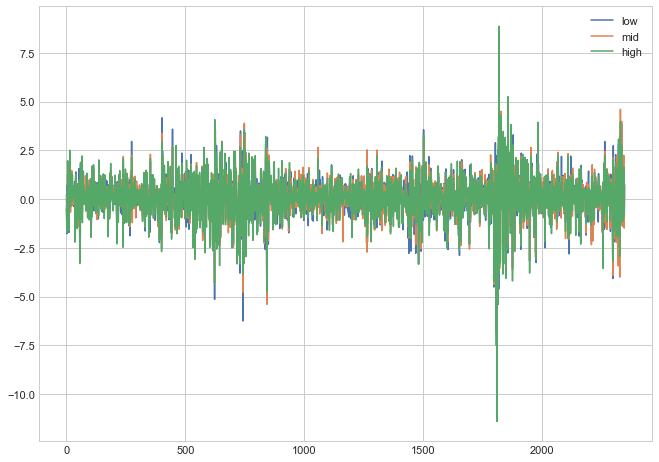

In [348]:
plt.plot(tl_m, label = 'low')
plt.plot(tl_mm, label = 'mid')
plt.plot(tl_mmm, label = 'high')
plt.legend();

In [349]:
rt['port_low'] = tl_m
rt['port_mid'] = tl_mm
rt['port_high'] = tl_mmm

In [350]:
#rt.to_excel('rt.xlsx')
#ff.to_excel('ff.xlsx')
#esg_esg.to_excel('esg_esg.xlsx')

In [351]:
test = rt.copy()
test = test.replace(0, np.nan)
test.dropna(how='all', axis='index', thresh=4, inplace=True)
test = test.replace(np.nan, 0)
tab = test.describe()

In [352]:
high_r = tab.loc['mean',:].sort_values(ascending=False).tolist()
tab.loc['mean',:].sort_values(ascending=False).head(10)

EVO_S      0.21323
VWS_D      0.17069
SRT3_G     0.15236
GMAB_D     0.15066
AMBUB_D    0.14433
SALM_N     0.13328
BAKKA_N    0.11673
DSV_D      0.10859
TOM_N      0.10842
BAVA_D     0.09999
Name: mean, dtype: float64

In [353]:
high_l = tab.loc['mean',:].sort_values(ascending=True).tolist()
tab.loc['mean',:].sort_values(ascending=True).head(10)
esg_high_l = esg_esg.loc[:,['HMB_S','FLS_D','DBK_G','TELIA_S','HEN3_G','BAS_G','ESSITYB_S','BAYN_G','ISS_D','EOAN_G' ]].mean().tolist()

In [354]:
ww = tab.loc['mean',:].sort_values(ascending=False).index[:10].tolist()
ww1 = tab.loc['mean',:].sort_values(ascending=True).index[:10].tolist()

In [355]:
esg_high_r = esg_esg.loc[:,['EVO_S','VWS_D','SRT3_G','GMAB_D','AMBUB_D','SALM_N','BAKKA_N','DSV_D','TOM_N','BAVA_D' ]].mean().tolist()

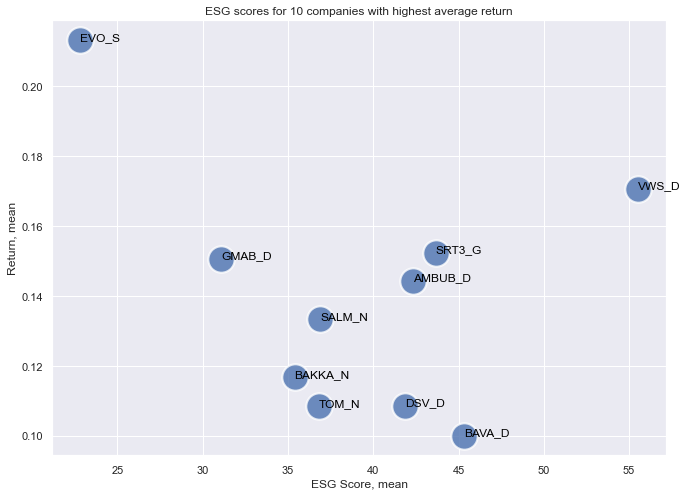

In [364]:
#Stocks with higest avg return
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(x=esg_high_r,y=high_r[:10], s=700,alpha=0.8)
plt.xlabel('ESG Score, mean')
plt.ylabel('Return, mean')
plt.title('ESG scores for 10 companies with highest average return')
#For each point, we add a text inside the bubble

for line in range(0,10):
     plt.text(esg_high_r[line], high_r[:10][line], ww[line], horizontalalignment='left', size='medium', color='black', weight='medium')
plt.savefig('best.png');

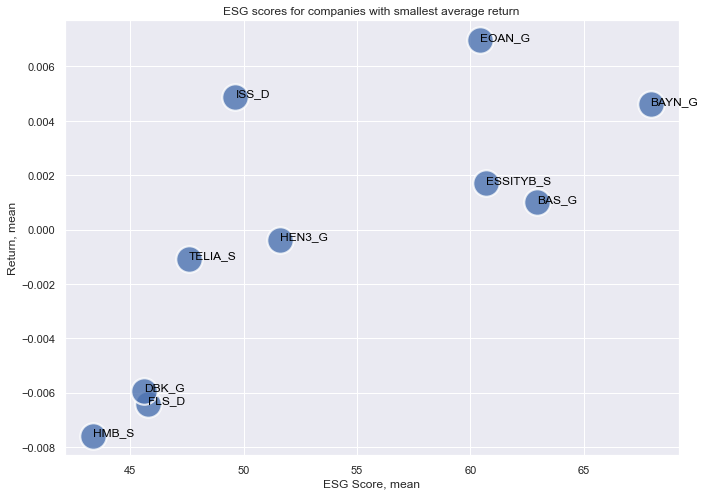

In [363]:
#Stocks with higest avg return
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(x=esg_high_l,y=high_l[:10], s=700,alpha=0.8)
plt.xlabel('ESG Score, mean')
plt.ylabel('Return, mean')
plt.title('ESG scores for 10 companies with smallest average return')
#For each point, we add a text inside the bubble

for line in range(0,10):
     plt.text(esg_high_l[line], high_l[:10][line], ww1[line], horizontalalignment='left', size='medium', color='black', weight='medium')
plt.savefig('worst.png');

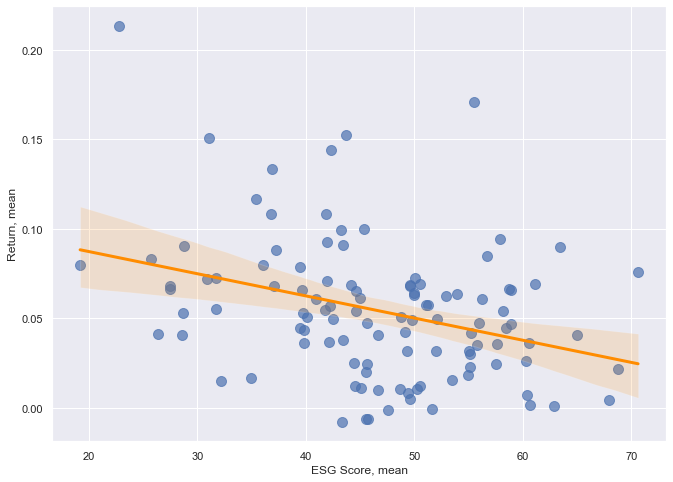

In [358]:
sns.set(rc={'figure.figsize':(11,8)})
sns.regplot(x=esg_esg.mean(),y=tab.loc['mean',:][:-3],
            line_kws={'lw': 3, 'color': 'darkorange'},
           scatter_kws={'s': 100, 'alpha': 0.7}); #Stocks with higest avg return
plt.xlabel('ESG Score, mean')
plt.ylabel('Return, mean')
plt.savefig('scatter.png');